In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

import matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')

In [11]:
def computeBlackScholesCallPrice(t,T,S,r,sigma,K):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))
    d2 = d1 - sigma* np.sqrt(T-t)
    return S*stat.norm.cdf(d1) - K*np.exp(-r*(T-t))*stat.norm.cdf(d2)

def computeBlackScholesPutPrice(t,T,S,r,sigma,K):
    return computeBlackScholesCallPrice(t,T,S,r,sigma,K) - (S - K*np.exp(-r*(T-t)))

In [12]:
def call_option_payoff(K, S):
    return np.maximum(S-K,0)

def put_option_payoff(K, S):
    return np.maximum(K-S,0)

In [13]:
K = 100
S = np.linspace(start = 50,stop = 150, num = 1000)
t = 0
T = 1
r = 0.03
sigma = 0.1
K = 100

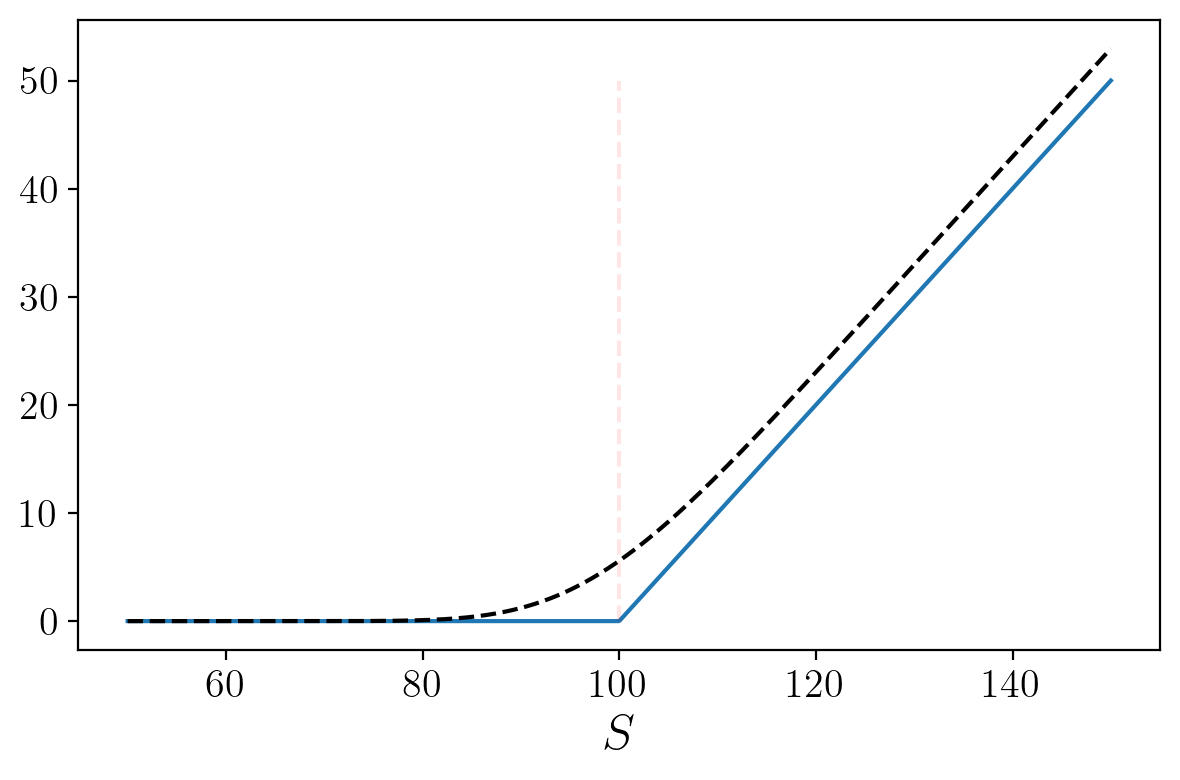

In [17]:
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)
payoff = call_option_payoff(K = K, S = S)

plt.figure()
plt.plot(S, payoff, linestyle = '-')
plt.plot(S, prices, linestyle = '--', color='black')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-price-vs-payoff.pdf', format="pdf", dpi=resolution_value)
plt.show()

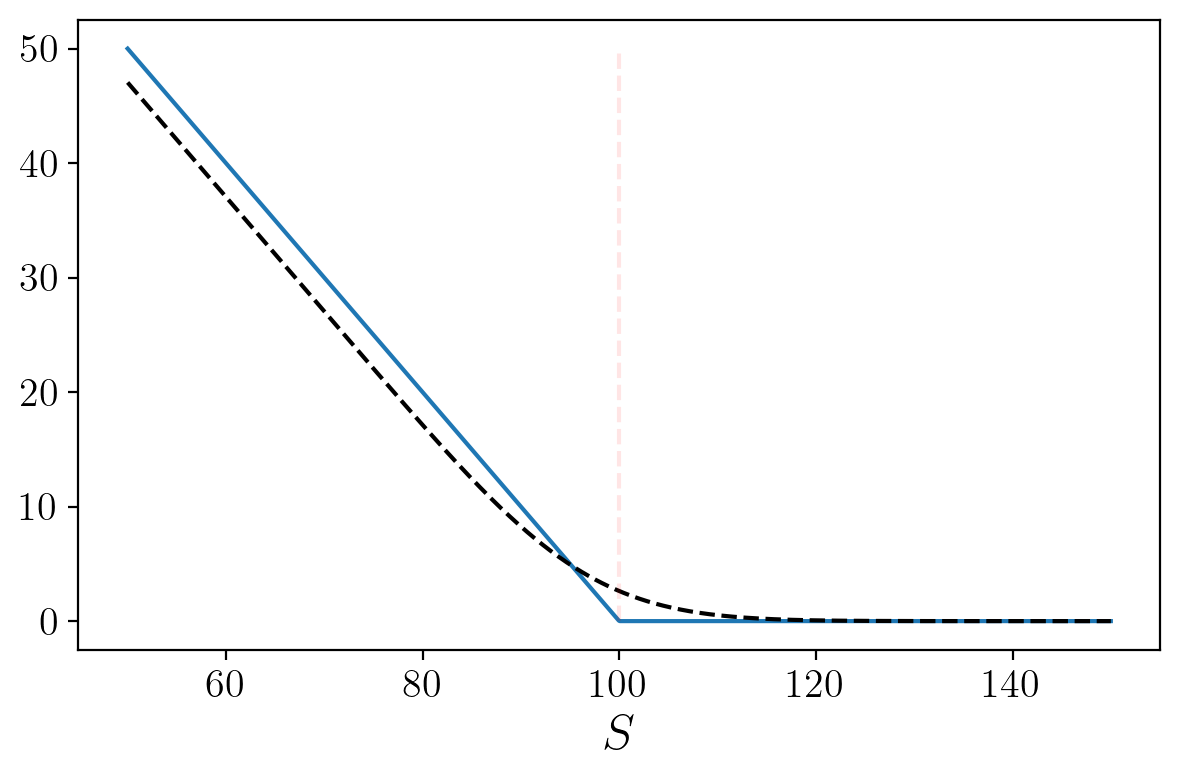

In [18]:
prices = computeBlackScholesPutPrice(t,T,S,r,sigma,K)
payoff = put_option_payoff(K = K, S = S)

plt.figure()
plt.plot(S, payoff, linestyle = '-')
plt.plot(S, prices, linestyle = '--', color='black')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.xlabel(r'$S$',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/put-price-vs-payoff.pdf', format="pdf", dpi=resolution_value)
plt.show()

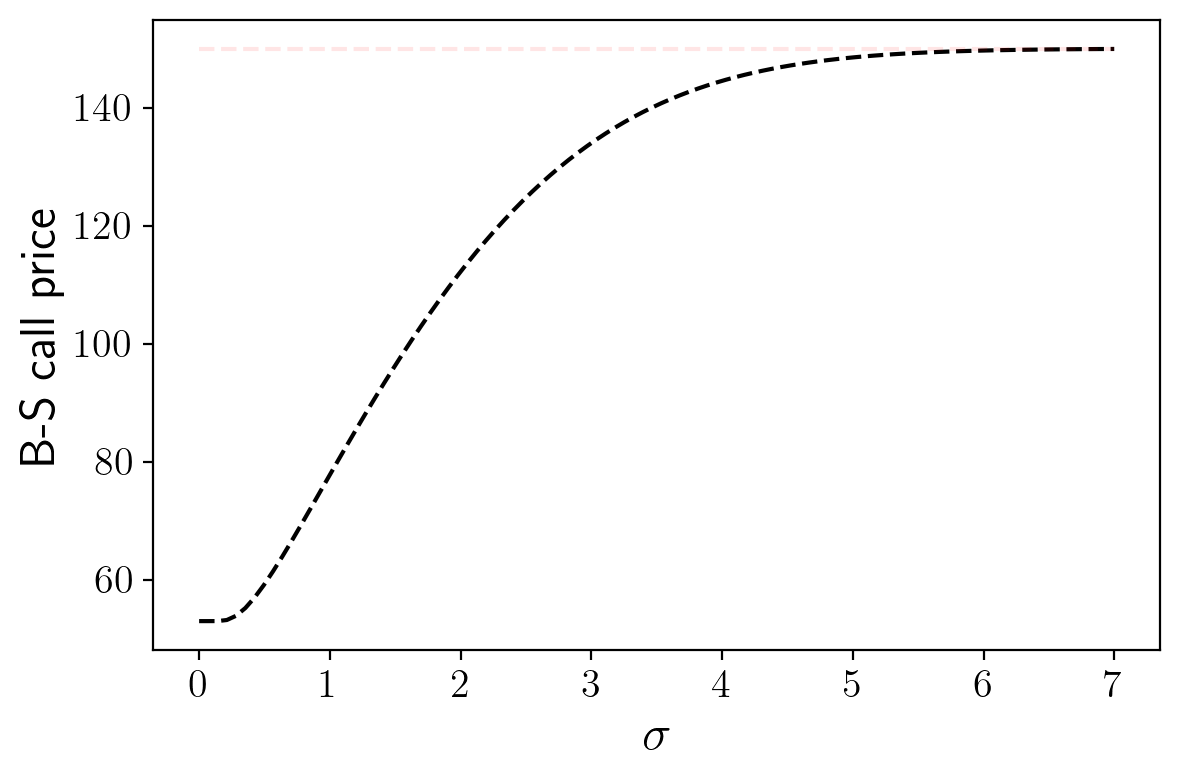

In [25]:
S = 150
sigma = np.linspace(start = 0,stop = 7, num = 100)
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)

plt.figure()
plt.plot(sigma, prices, linestyle = '--', color='black')
plt.hlines(y = S, xmin = 0, xmax = np.max(sigma), color = 'r', linestyles='--', alpha = 0.1)
#plt.hlines(y = S-K, xmin = 0, xmax = np.max(sigma), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.xlabel(r'$\sigma$',  fontsize=18)
plt.ylabel('B-S call price',  fontsize=18)
plt.tight_layout()
plt.savefig('../figures/call-price-as-a-fct-of-vol.pdf', format="pdf", dpi=resolution_value)
plt.show()